In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, download_plotlyjs, plot, iplot
import cufflinks as cf

%matplotlib inline

In [25]:
data = pd.read_csv('Credit Card Fraud Dataset/creditcard.csv')

In [26]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [28]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


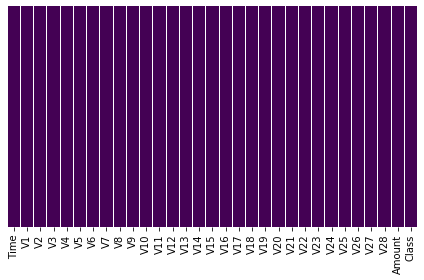

In [29]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.tight_layout()

# There are no missing values in the dataset.


AxesSubplot(0.125,0.125;0.775x0.755)


0    99.827251
1     0.172749
Name: Class, dtype: float64

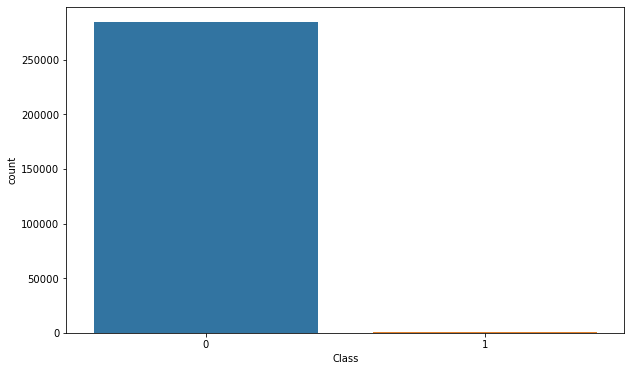

In [30]:
plt.figure(figsize=(10,6))
print(sns.countplot(x='Class', data=data))
data['Class'].value_counts(normalize=True) * 100

# Dataset is highly imbalanced
<h3> 99.83% Non-Fraudulent Transactions

0.173% Fraudulent Transactions

Hence, we require either oversampling or undersampling </h3>

# Distribution of Amount & Time columns

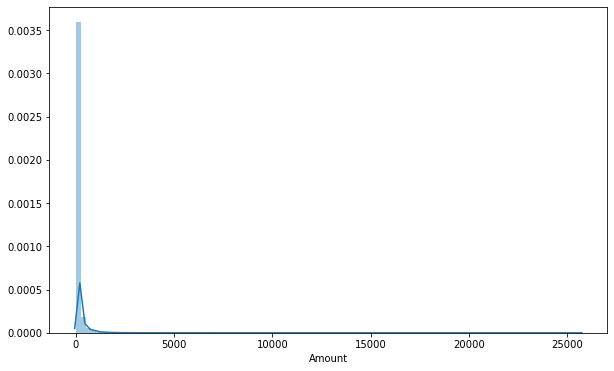

In [31]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Amount'], bins=100)

<h3> Amount of transactions are generally very low, most are less than 1000 and max. tend to be around 1500 </h3>

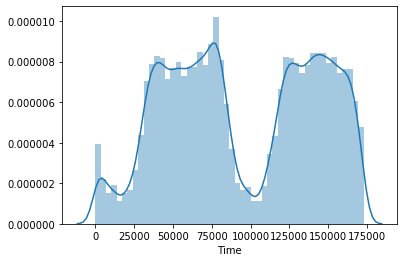

In [32]:
sns.distplot(data['Time'])

# Scaling the Time and Amount columns

In [33]:
from sklearn.preprocessing import RobustScaler

# Not using StandardScaler as RobustScaler is less prone to outliers
rob_scaler = RobustScaler()

data['Scaled_Time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data['Scaled_Amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [34]:
data.drop(['Time','Amount'], axis=1, inplace=True)

In [35]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


# k-Fold Cross Validation Algorithm (used to prevent overfitting)
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    
    3.1. Take the group as a hold out or test data set
    
    3.2. Take the remaining groups as a training data set
    
    3.3. Fit a model on the training set and evaluate it on the test set
    
    3.4. Retain the evaluation score and discard the model
    
4. Summarize the skill of the model using the sample of model evaluation scores

# Stratified k-Fold Cross Validation
In stratified k-fold cross-validation, the folds are selected so that "***the mean response value is approximately equal in all the folds***". In the case of a dichotomous classification, this means that each fold contains roughly the same proportions of the two types of class labels.

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

X = data.drop('Class', axis=1)
y = data['Class']

# Stratified 5 Fold
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# train_index and test_index are a list of indices obtained from the StratifiedKFold.split() method
# We perform iloc on the X and y dataframes to get X_train, X_test and y_train, y_test
# and both y_test and y_train have same distribution of 0 and 1 class values, i.e, approx. 99.82% and 0.17% respectively
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
print("Class Label Distribution for y_train: ")
print(y_train.value_counts(normalize=True))
print("Class Label Distribution for y_test: ")
print(y_test.value_counts(normalize=True))

Class Label Distribution for y_train: 
0    0.998271
1    0.001729
Name: Class, dtype: float64
Class Label Distribution for y_test: 
0    0.99828
1    0.00172
Name: Class, dtype: float64


<h2> Thus we get train and test splits with the same mean value for the response variable (Class) </h2>

# <u> Hyperparameter Tuning using Random Search</u>
# Basic Hyperparameter Tuning components
Objective function: takes in hyperparameters and returns the cross validation score we want to maximize or minimize

Domain of hyperparameters: values over which we want to search

Algorithm: method for selecting the next hyperparameter values to evaluate in the objective function

Results: history of hyperparameters and cross validation scores

# Grid Search
For a given model, it takes in the domain of hyperparameter values and checks every possible combination to find which settings perform the best on an evaluation score specified. Very time consuming.

# <u> Random Search </u>
It takes in the domain as well, but it randomly selects the set of hyperparameters from the search space. Results in more evenly spaced out hyperparameter values and gives similar results to Grid Search albeit a bit lower. 
Generally used on an unknown dataset in order to get rough estimate of the domain in which the model performs well and then Grid Search can be implemented to increase the accuracy further.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

# The C parameter list can be converted to logspace like "list(np.logspace(np.log10(0.001), np.log10(1000)"
# but performing cross-validation on this would be very time consuming, hence just using the basic list for now.

# can also add the 'solver' parameter to the dictionary later
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# It contains the estimator (LogisticRegression in our case and also the dictionary of hyperparameters)
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params)

rand_log_reg

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

Parameters
----------------


penalty : str, 'l1', 'l2', 'elasticnet' or 'none', optional (default='l2')
    Used to specify the norm used in the penalization. The 'newton-cg',
    'sag' and 'lbfgs' solvers support only l2 penalties. 'elasticnet' is
    only supported by the 'saga' solver. If 'none' (not supported by the
    liblinear solver), no regularization is applied.

    .. versionadded:: 0.19
       l1 penalty with SAGA solver (allowing 'multinomial' + L1)

dual : bool, optional (default=False)
    Dual or primal formulation. Dual formulation is only implemented for
    l2 penalty with liblinear solver. Prefer dual=False when
    n_samples > n_features.

tol : float, optional (default=1e-4)
    Tolerance for stopping criteria.

C : float, optional (default=1.0)
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.

fit_intercept : bool, optional (default=True)
    Specifies if a constant (a.k.a. bias or intercept) should be
    added to the decision function.

intercept_scaling : float, optional (default=1)
    Useful only when the solver 'liblinear' is used
    and self.fit_intercept is set to True. In this case, x becomes
    [x, self.intercept_scaling],
    i.e. a "synthetic" feature with constant value equal to
    intercept_scaling is appended to the instance vector.
    The intercept becomes ``intercept_scaling * synthetic_feature_weight``.

    Note! the synthetic feature weight is subject to l1/l2 regularization
    as all other features.
    To lessen the effect of regularization on synthetic feature weight
    (and therefore on the intercept) intercept_scaling has to be increased.

class_weight : dict or 'balanced', optional (default=None)
    Weights associated with classes in the form ``{class_label: weight}``.
    If not given, all classes are supposed to have weight one.

    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``.

    Note that these weights will be multiplied with sample_weight (passed
    through the fit method) if sample_weight is specified.

    .. versionadded:: 0.17
       *class_weight='balanced'*

random_state : int, RandomState instance or None, optional (default=None)
    The seed of the pseudo random number generator to use when shuffling
    the data.  If int, random_state is the seed used by the random number
    generator; If RandomState instance, random_state is the random number
    generator; If None, the random number generator is the RandomState
    instance used by `np.random`. Used when ``solver`` == 'sag' or
    'liblinear'.

solver : str, {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},              optional (default='liblinear').

    Algorithm to use in the optimization problem.

    - For small datasets, 'liblinear' is a good choice, whereas 'sag' and
      'saga' are faster for large ones.
    - For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs'
      handle multinomial loss; 'liblinear' is limited to one-versus-rest
      schemes.
    - 'newton-cg', 'lbfgs', 'sag' and 'saga' handle L2 or no penalty
    - 'liblinear' and 'saga' also handle L1 penalty
    - 'saga' also supports 'elasticnet' penalty
    - 'liblinear' does not handle no penalty

    Note that 'sag' and 'saga' fast convergence is only guaranteed on
    features with approximately the same scale. You can
    preprocess the data with a scaler from sklearn.preprocessing.

    .. versionadded:: 0.17
       Stochastic Average Gradient descent solver.
    .. versionadded:: 0.19
       SAGA solver.
    .. versionchanged:: 0.20
        Default will change from 'liblinear' to 'lbfgs' in 0.22.

max_iter : int, optional (default=100)
    Maximum number of iterations taken for the solvers to converge.

multi_class : str, {'ovr', 'multinomial', 'auto'}, optional (default='ovr')
    If the option chosen is 'ovr', then a binary problem is fit for each
    label. For 'multinomial' the loss minimised is the multinomial loss fit
    across the entire probability distribution, *even when the data is
    binary*. 'multinomial' is unavailable when solver='liblinear'.
    'auto' selects 'ovr' if the data is binary, or if solver='liblinear',
    and otherwise selects 'multinomial'.

    .. versionadded:: 0.18
       Stochastic Average Gradient descent solver for 'multinomial' case.
    .. versionchanged:: 0.20
        Default will change from 'ovr' to 'auto' in 0.22.

verbose : int, optional (default=0)
    For the liblinear and lbfgs solvers set verbose to any positive
    number for verbosity.

warm_start : bool, optional (default=False)
    When set to True, reuse the solution of the previous call to fit as
    initialization, otherwise, just erase the previous solution.
    Useless for liblinear solver. See :term:`the Glossary <warm_start>`.

    .. versionadded:: 0.17
       *warm_start* to support *lbfgs*, *newton-cg*, *sag*, *saga* solvers.

n_jobs : int or None, optional (default=None)
    Number of CPU cores used when parallelizing over classes if
    multi_class='ovr'". This parameter is ignored when the ``solver`` is
    set to 'liblinear' regardless of whether 'multi_class' is specified or
    not. ``None`` means 1 unless in a :obj:`joblib.parallel_backend`
    context. ``-1`` means using all processors.
    See :term:`Glossary <n_jobs>` for more details.

l1_ratio : float or None, optional (default=None)
    The Elastic-Net mixing parameter, with ``0 <= l1_ratio <= 1``. Only
    used if ``penalty='elasticnet'`. Setting ``l1_ratio=0`` is equivalent
    to using ``penalty='l2'``, while setting ``l1_ratio=1`` is equivalent
    to using ``penalty='l1'``. For ``0 < l1_ratio <1``, the penalty is a
    combination of L1 and L2.

In [38]:
# Defining lists which will contain various metric values as cross-validation progresses
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Using Oversampling with Cross-Validation

You have to perform Oversampling within the Cross-Validation itself and not before it, otherwise it would lead to data leakage.
This is because it is possible that by Oversampling before, you are duplicating data from one fold to another, which would could be the test fold, and due to this, the test data is not really unseen and it could lead to overfitting.

In [39]:
# Takes a lot of time to execute
for train, test in sss.split(X_train, y_train):
    # SMOTE happens during Cross Validation not before
    pipeline = make_pipeline_imb(SMOTE(sampling_strategy='minority'), rand_log_reg) 
    
    # Time consuming step
    model = pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    
    best_est_rand = rand_log_reg.best_estimator_
    
    # Testing the best estimator (best_est) on the best performing set of parameters (inherently done by predict method)
    prediction = best_est_rand.predict(X_train.iloc[test])
    
    # Appending metric scores to their respective list
    accuracy_lst.append(pipeline.score(X_train.iloc[test], y_train.iloc[test]))
    precision_lst.append(precision_score(y_train.iloc[test], prediction))
    recall_lst.append(recall_score(y_train.iloc[test], prediction))
    f1_lst.append(f1_score(y_train.iloc[test], prediction))
    auc_lst.append(roc_auc_score(y_train.iloc[test], prediction))

print("Cross Validation Oversampling Training with Metric Calculations Completed")

Cross Validation Oversampling with Testing Completed


<h2> Printing the mean of the metric measures recorded in the lists </h2>

<h3> Average Recall is 91% <br> <br> Average ROC AUC is 94% </h3>

In [133]:
print('---' * 30)
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print("roc: {}".format(np.mean(auc_lst)))
print('---' * 30)

------------------------------------------------------------------------------------------
accuracy: 0.9704275662803598
precision: 0.06461868077518367
recall: 0.9137617656604998
f1: 0.11959619570879162
roc: 0.9421437780841015
------------------------------------------------------------------------------------------


<h3> On the actual test data X_test, we get Recall Score of 86% for Fraud Class</h3>

In [135]:
labels = ['No Fraud', 'Fraud']
rand_log_reg_prediction = best_est_rand.predict(X_test)
print(classification_report_imbalanced(y_test, rand_log_reg_prediction, target_names=labels))

                   pre       rec       spe        f1       geo       iba       sup

   No Fraud       1.00      0.99      0.86      0.99      0.92      0.86     56863
      Fraud       0.10      0.86      0.99      0.18      0.92      0.83        98

avg / total       1.00      0.99      0.86      0.99      0.92      0.86     56961



<h3> Average Precision-Recall Score on test data is 70% </h3>

In [117]:
from sklearn.metrics import average_precision_score

# In the case of logistic regression, the predict_proba function returns the value of "f(x)=1/1+e^(−(β0+β1x1+⋯+βkxk))"
# for given input X with k features

# The decision function returns the value of "d(x)=β0+β1x1+⋯+βkxk"
# The predict function returns 1 if value of predict_proba is > 0.5 else 0

y_score = best_est_rand.predict_proba(X_test)[:, 1]

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.70


<h3> Plotting the Precision-Recall Curve </h3>

In [136]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_score)

precision_recall_df = pd.DataFrame({'precision': precision, 'recall': recall})

plot_title = '<b>Precision-Recall Curve<br>Avg. Precision Recall Score=' + str(average_precision)
precision_recall_df.iplot(x='recall',y='precision',xTitle='Recall',yTitle='Precision',title=plot_title,fill=True,color='green')

# Plotting the ROC Curve

In [137]:
from sklearn.metrics import roc_curve

y_score = best_est_rand.predict_proba(X_test)[:, 1]

false_positive_rate, true_positive_rate, _ = roc_curve(y_test,  y_score)

auc = roc_auc_score(y_test, y_score)

roc_df = pd.DataFrame({'fpr': false_positive_rate, 'tpr': true_positive_rate})

plot_title = '<b>ROC Curve<br>ROC Score = ' + str(auc)
roc_df.iplot(x='fpr',y='tpr',xTitle='False Positive Rate',yTitle='True Positive Rate',title=plot_title,color='green',fill=True)

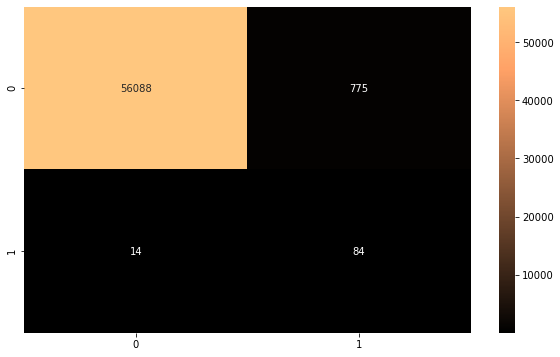

In [147]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix_log_reg = confusion_matrix(y_true=y_test, y_pred=rand_log_reg_prediction)

# plot_confusion_matrix(best_est_rand, X_test, y_test, normalize='true', cmap='copper')
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_log_reg, annot=True, cmap='copper', fmt='d')

# Using GridSearch to Fit the data and comparing with RandomSearch

<h3> Creating a new SMOTE Model and again resampling the data to get new X and Y: Xsm_train and ysm_train </h3>

In [155]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Creating a GridSearchCV model using the log_reg_params we did for RandomizedCV
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)

# Creating a new SMOTE model
smote_model = SMOTE(sampling_strategy='minority', random_state=42)

# Oversampling the training data on smote_model
Xsm_train, ysm_train = smote_model.fit_sample(X_train, y_train)

# Thus data has been oversampled
print("Original y_train counts")
print(y_train.value_counts())
print("\nOversampled y_train counts")
print(ysm_train.value_counts())

Original y_train counts
0    227452
1       394
Name: Class, dtype: int64

Oversampled y train counts
1    227452
0    227452
Name: Class, dtype: int64


In [156]:
# Takes a lot of time
grid_log_reg.fit(Xsm_train, ysm_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [157]:
# Fit the Oversampled training data on the best estimator and the best parameters obtained from GridSearch
best_est_grid = grid_log_reg.best_estimator_

best_est_grid.fit(Xsm_train, ysm_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
grid_log_reg_predictions = best_est_grid.predict(X_test)

print("Classification Report for Randomized CV")
print(classification_report_imbalanced(y_true=y_test, y_pred=rand_log_reg_prediction))


print(classification_report_imbalanced(y_true=y_test, y_pred=grid_log_reg_predictions))


Classification Report for Randomized CV
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.86      0.99      0.92      0.86     56863
          1       0.10      0.86      0.99      0.18      0.92      0.83        98

avg / total       1.00      0.99      0.86      0.99      0.92      0.86     56961

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.87      0.99      0.93      0.87     56863
          1       0.11      0.87      0.99      0.19      0.93      0.85        98

avg / total       1.00      0.99      0.87      0.99      0.93      0.87     56961



<h3> Classification Report for RandomSearchCV </h3> 

                      pre       rec       spe        f1       geo       iba       sup

              0       1.00      0.99      0.86      0.99      0.92      0.86     56863
              1       0.10      0.86      0.99      0.18      0.92      0.83        98

       avg / total    1.00      0.99      0.86      0.99      0.92      0.86     56961
       
       
<h3> Classification Report for GridSearchCV </h3>
  
                      pre       rec       spe        f1       geo       iba       sup

              0       1.00      0.99      0.87      0.99      0.93      0.87     56863
              1       0.11      0.87      0.99      0.19      0.93      0.85        98

    avg / total       1.00      0.99      0.87      0.99      0.93      0.87     56961
    
<h2> Note that the recall increased from 86% to 87%!

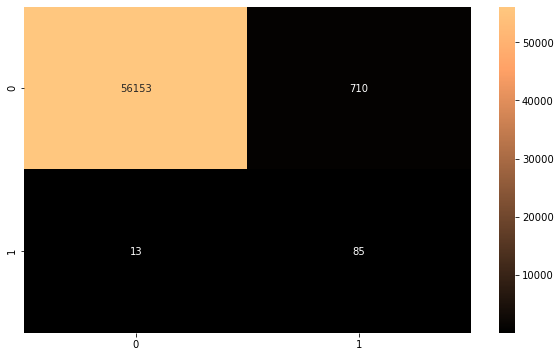

In [160]:
from sklearn.metrics import confusion_matrix

confusion_matrix_log_reg = confusion_matrix(y_true=y_test, y_pred=grid_log_reg_predictions)

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_log_reg, annot=True, cmap='copper', fmt='d')

<h2> Average Precision-Recall Score on test data is 74% </h2>

In [161]:
y_score = best_est_grid.predict_proba(X_test)[:, 1]

average_precision_score(y_test, y_score)

0.7413963090868431

<h2> Average ROC AUC Score on test data is 98% </h2>

In [162]:
roc_auc_score(y_test, y_score)

0.9812937432504261